<a href="https://www.kaggle.com/code/necatiemresnmez/rating-product-and-sorting-reviews-in-amazon?scriptVersionId=225024991" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Rating Product & Sorting Reviews in Amazon


Business Problems = 

One of the most important problems in e-commerce is the correct calculation of the points given to the products after sales. The solution to this problem means more customer satisfaction for the e-commerce site, product prominence for sellers and a smooth shopping experience for buyers. Another problem is the correct ordering of the comments given to the products. Since the prominence of misleading comments will directly affect the sales of the product, it will cause both financial loss and customer loss. In solving these 2 basic problems, e-commerce sites and sellers will increase their sales, while customers will complete their purchasing journey smoothly.


DataSet=
This dataset containing Amazon product data includes product categories and various metadata. The most reviewed product in the electronics category has user ratings and reviews.

reviewerID: User ID

asin: Product ID

reviewerName: Username

helpful: Helpful rating score

reviewText: Review text

overall: Product rating

summary: Review summary

unixReviewTime: Review timestamp

reviewTime: Review date

day_diff: Number of days since the review was posted

helpful_yes: Number of times the review was marked as helpful

total_vote: Total number of votes for the review



In [1]:
import pandas as pd
import math
import scipy.stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/kaggle/input/amazon-rating-product/amazon_review.csv")

In [3]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
df.tail(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.00000,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.00000,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.00000,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.00000,Great little card,1379289600,2013-09-16,448,0,0
4914,A8KGFTFQ86IBR,B007WTAJTO,Zza,"[0, 0]",I've heard bad things about this 64gb Micro SD...,5.00000,So far so good.,1388620800,2014-02-01,310,0,0


In [5]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])


In [6]:
first_date = df["reviewTime"].min()
last_date = df["reviewTime"].max()  
print(first_date,last_date)

2012-01-09 00:00:00 2014-12-07 00:00:00


In [7]:
total_days = (last_date - first_date).days

print(f"total number of days: {total_days}")

total number of days: 1063


In [8]:
average_rating = df["overall"].mean()
print(f"Average Score of the Product: {average_rating:.2f}")

Average Score of the Product: 4.59


In [9]:
current_date = pd.to_datetime ("2014-12-07")
df["days"] = (current_date - df['reviewTime']).dt.days

I will calculate the weighted average score by date by dividing the number of days by 4

In [10]:
df.loc[df["days"] <= 266, "overall"].mean() * 19/100 + \
    df.loc[(df["days"] > 266) & (df["days"] <= 532), "overall"].mean() * 22/100 + \
    df.loc[(df["days"] > 533) & (df["days"] <= 797), "overall"].mean() * 26/100 + \
    df.loc[(df["days"] > 797), "overall"].mean() * 33/100

4.519522604517212

In [11]:
# Averages by time periods
mean_1 = df.loc[df["days"] <= 266, "overall"].mean()
mean_2 = df.loc[(df["days"] > 266) & (df["days"] <= 532), "overall"].mean()
mean_3 = df.loc[(df["days"] > 533) & (df["days"] <= 797), "overall"].mean()
mean_4 = df.loc[(df["days"] > 797), "overall"].mean()

print(f"Average of less than 266 days: {mean_1:.2f}")
print(f"Average in the range 267 - 532 days: {mean_2:.2f}")
print(f"Average in the range 533 - 797 days: {mean_3:.2f}")
print(f"Average over 798 days: {mean_4:.2f}")

Average of less than 266 days: 4.68
Average in the range 267 - 532 days: 4.63
Average in the range 533 - 797 days: 4.49
Average over 798 days: 4.38


In [12]:
weighted_average = (mean_1 * 19/100) + (mean_2 * 22/100) + (mean_3 * 26/100) + (mean_4 * 33/100)

In [13]:
categories = ["0-266 day", "267-532 day", "533-797 day", "798-1063 day", "weight avarage"]
values = [mean_1, mean_2, mean_3, mean_4, weighted_average]


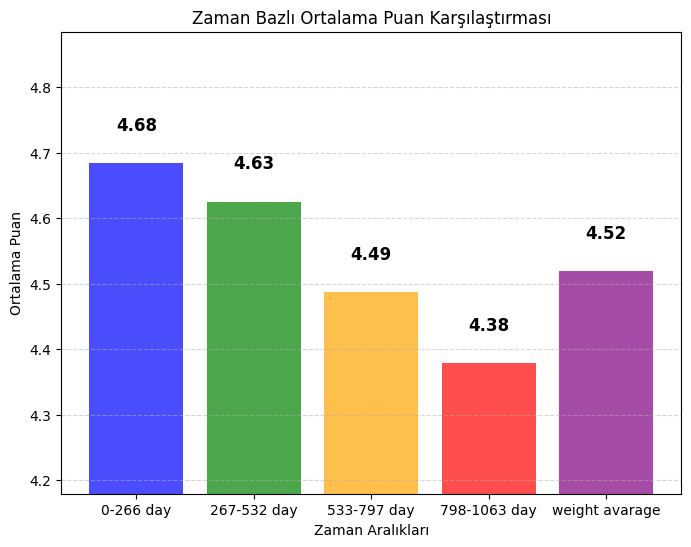

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=["blue", "green", "orange", "red", "purple"], alpha=0.7)
plt.xlabel("Zaman Aralıkları")
plt.ylabel("Ortalama Puan")
plt.title("Zaman Bazlı Ortalama Puan Karşılaştırması")
plt.ylim(min(values) - 0.2, max(values) + 0.2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Değerleri çubukların üstüne yazma
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

WLB Calculation

In [15]:
df["helpful_no"] = df["total_vote"] - df["helpful_yes"]

In [16]:
def score_average_rating(helpful_yes, helpful_no):
    if helpful_yes + helpful_no == 0:
        return 0
    return helpful_yes / (helpful_yes + helpful_no)

In [17]:
def wilson_lower_bound(helpful_yes, helpful_no, confidence=0.95):

    n = helpful_yes + helpful_no
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * helpful_yes / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [18]:
df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"], x["helpful_no"]), axis=1)
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)

df.sort_values("wilson_lower_bound", ascending=False).head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,days,helpful_no,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,701,68,0.96634,0.95754
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.00000,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,802,77,0.94884,0.93652
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,578,126,0.92562,0.91214
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.00000,"Warning, read this!",1346544000,2012-02-09,1033,422,495,1032,73,0.85253,0.81858
4672,A2DKQQIZ793AV5,B007WTAJTO,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.00000,Super high capacity!!! Excellent price (on Am...,1394150400,2014-07-03,158,45,49,157,4,0.91837,0.80811


In [19]:
top_reviews = df.sort_values("wilson_lower_bound", ascending=False).head(20)
print("\n--- Top 20 Reviews Based on Wilson Score ---")
print(top_reviews)


--- Top 20 Reviews Based on Wilson Score ---
          reviewerID        asin                          reviewerName       helpful                                         reviewText  overall                                            summary  unixReviewTime reviewTime  day_diff  helpful_yes  total_vote  days  helpful_no  score_average_rating  wilson_lower_bound
2031  A12B7ZMXFI6IXY  B007WTAJTO                  Hyoun Kim "Faluzure"  [1952, 2020]  [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...  5.00000  UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...      1367366400 2013-01-05       702         1952        2020   701          68               0.96634             0.95754
3449   AOEAD7DPLZE53  B007WTAJTO                     NLee the Engineer  [1428, 1505]  I have tested dozens of SDHC and micro-SDHC ca...  5.00000  Top of the class among all (budget-priced) mic...      1348617600 2012-09-26       803         1428        1505   802          77               0.94884             0.93652


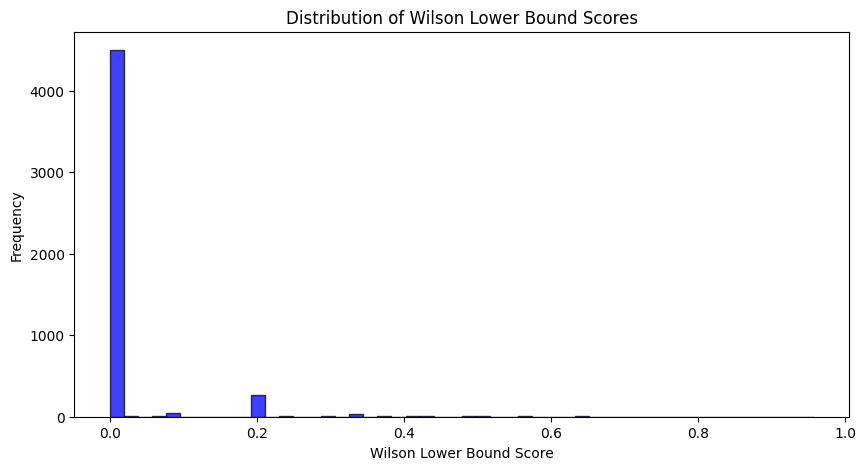

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(df["wilson_lower_bound"], bins=50, alpha=0.75, color="blue", edgecolor="black")
plt.xlabel("Wilson Lower Bound Score")
plt.ylabel("Frequency")
plt.title("Distribution of Wilson Lower Bound Scores")
plt.show()

In [21]:
average_rating = df["overall"].mean()
weighted_rating = (df["overall"] * df["wilson_lower_bound"]).sum() / df["wilson_lower_bound"].sum()


In [22]:
print(f"\nAverage Rating: {average_rating:.2f}")
print(f"Weighted Rating (Based on Wilson Score): {weighted_rating:.2f}")



Average Rating: 4.59
Weighted Rating (Based on Wilson Score): 4.06
